In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8372085094451904, 'full_set_var_values': [0.04720380902290344, 0.044494450092315674, 0.035342536866664886, 0.02611238695681095, 0.02580399066209793, 0.023139387369155884, 0.022728022187948227, 0.020031532272696495, 0.019578007981181145, 0.01777792163193226, 0.017403751611709595, 0.015105344355106354, 0.014606666751205921, 0.01379549503326416, 0.01329789124429226, 0.012884845025837421, 0.01252143457531929, 0.012064694426953793, 0.011867150664329529, 0.010915021412074566, 0.01057171169668436, 0.010373061522841454, 0.009938064962625504, 0.009738999418914318, 0.00940626859664917, 0.009144316427409649, 0.008902674540877342, 0.00872676633298397, 0.008597584441304207, 0.008209249936044216, 0.007903060875833035, 0.007700569927692413, 0.00765777425840497, 0.007498912047594786, 0.007375513669103384, 0.007219691760838032, 0.007143080700188875, 0.00705082667991519, 0.006823307368904352, 0.006683649495244026, 0.0065062823705375195, 0.006437181029468775, 0

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
results = {}

In [7]:
results['subset_size'] = subset_sizes
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [8]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [9]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,reddit_loss,reddit_accuracy,twitter_rd_loss,twitter_rd_accuracy,fin_sent_loss,fin_sent_accuracy,kindle_loss,kindle_accuracy,rottent_tomatoes_loss,rottent_tomatoes_accuracy,imdb_loss,imdb_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy
0,5387,0.832513,0.894729,0.252211,0.957009,0.524329,0.913332,0.545630,0.650010,0.668879,0.447111,0.781167,0.374827,0.842402,0.431733,0.79568,0.856026,0.517812,0.348197,0.839000
1,10774,0.835165,0.908389,0.233609,0.953726,0.591198,0.871715,0.620019,0.572613,0.743363,0.459288,0.809333,0.391486,0.848968,0.395267,0.82452,0.858781,0.601372,0.276874,0.883789
2,16161,0.836113,0.921010,0.221612,1.012404,0.581408,0.911764,0.608939,0.617610,0.758481,0.470164,0.830000,0.405785,0.869606,0.448422,0.82716,1.020522,0.564033,0.320366,0.872974
3,21548,0.836640,0.930364,0.213834,1.210539,0.566474,1.126426,0.574491,0.730551,0.726401,0.461901,0.836167,0.399524,0.884615,0.441556,0.83672,1.225872,0.546776,0.320186,0.874658
4,26935,0.836827,0.926503,0.197311,0.976921,0.586261,0.865359,0.613059,0.588115,0.743363,0.464937,0.824167,0.377535,0.878049,0.407550,0.83892,0.899326,0.597437,0.291093,0.882763
5,32322,0.837011,0.929473,0.188646,0.952012,0.569129,0.852877,0.592698,0.747942,0.624263,0.471368,0.819750,0.337042,0.884615,0.430204,0.82440,0.974141,0.537693,0.333663,0.862026
6,37709,0.837129,0.933779,0.184687,1.087722,0.552578,0.997917,0.567976,0.896950,0.579277,0.528843,0.796750,0.355061,0.888368,0.445961,0.81900,1.183100,0.498032,0.348262,0.856974
7,43096,0.837254,0.937194,0.179340,1.109223,0.548264,1.013258,0.569109,0.651637,0.698009,0.421858,0.837417,0.356362,0.883677,0.419831,0.83100,1.020840,0.545363,0.297840,0.877500
8,48483,0.837412,0.944172,0.189077,1.624530,0.540175,1.468453,0.558956,0.917937,0.667035,0.592189,0.828083,0.426398,0.898687,0.467836,0.84200,1.678149,0.503078,0.342963,0.880632
9,53870,0.837376,0.952190,0.176568,1.548952,0.551126,1.378893,0.573860,0.901913,0.703540,0.684578,0.807500,0.469852,0.889306,0.510057,0.83844,1.577451,0.542941,0.377826,0.870868


In [10]:
results_df['mean_odd_accuracy'] = results_df[['imdb_accuracy', 'tweet_eval_accuracy', 'yelp_accuracy', 'kindle_accuracy', 'twitter_rd_accuracy', 'rottent_tomatoes_accuracy', 'reddit_accuracy', 'fin_sent_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['imdb_loss', 'tweet_eval_loss', 'yelp_loss', 'kindle_loss', 'twitter_rd_loss', 'rottent_tomatoes_loss', 'reddit_loss', 'fin_sent_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,reddit_loss,reddit_accuracy,twitter_rd_loss,twitter_rd_accuracy,fin_sent_loss,fin_sent_accuracy,...,rottent_tomatoes_loss,rottent_tomatoes_accuracy,imdb_loss,imdb_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,5387,0.832513,0.894729,0.252211,0.957009,0.524329,0.913332,0.545630,0.650010,0.668879,...,0.374827,0.842402,0.431733,0.79568,0.856026,0.517812,0.348197,0.839000,0.689362,0.622281
1,10774,0.835165,0.908389,0.233609,0.953726,0.591198,0.871715,0.620019,0.572613,0.743363,...,0.391486,0.848968,0.395267,0.82452,0.858781,0.601372,0.276874,0.883789,0.740320,0.597469
2,16161,0.836113,0.921010,0.221612,1.012404,0.581408,0.911764,0.608939,0.617610,0.758481,...,0.405785,0.869606,0.448422,0.82716,1.020522,0.564033,0.320366,0.872974,0.739075,0.650880
3,21548,0.836640,0.930364,0.213834,1.210539,0.566474,1.126426,0.574491,0.730551,0.726401,...,0.399524,0.884615,0.441556,0.83672,1.225872,0.546776,0.320186,0.874658,0.730788,0.739569
4,26935,0.836827,0.926503,0.197311,0.976921,0.586261,0.865359,0.613059,0.588115,0.743363,...,0.377535,0.878049,0.407550,0.83892,0.899326,0.597437,0.291093,0.882763,0.745502,0.608854
5,32322,0.837011,0.929473,0.188646,0.952012,0.569129,0.852877,0.592698,0.747942,0.624263,...,0.337042,0.884615,0.430204,0.82440,0.974141,0.537693,0.333663,0.862026,0.714322,0.637406
6,37709,0.837129,0.933779,0.184687,1.087722,0.552578,0.997917,0.567976,0.896950,0.579277,...,0.355061,0.888368,0.445961,0.81900,1.183100,0.498032,0.348262,0.856974,0.694869,0.730477
7,43096,0.837254,0.937194,0.179340,1.109223,0.548264,1.013258,0.569109,0.651637,0.698009,...,0.356362,0.883677,0.419831,0.83100,1.020840,0.545363,0.297840,0.877500,0.723792,0.661356
8,48483,0.837412,0.944172,0.189077,1.624530,0.540175,1.468453,0.558956,0.917937,0.667035,...,0.426398,0.898687,0.467836,0.84200,1.678149,0.503078,0.342963,0.880632,0.714831,0.939807
9,53870,0.837376,0.952190,0.176568,1.548952,0.551126,1.378893,0.573860,0.901913,0.703540,...,0.469852,0.889306,0.510057,0.83844,1.577451,0.542941,0.377826,0.870868,0.722198,0.931190


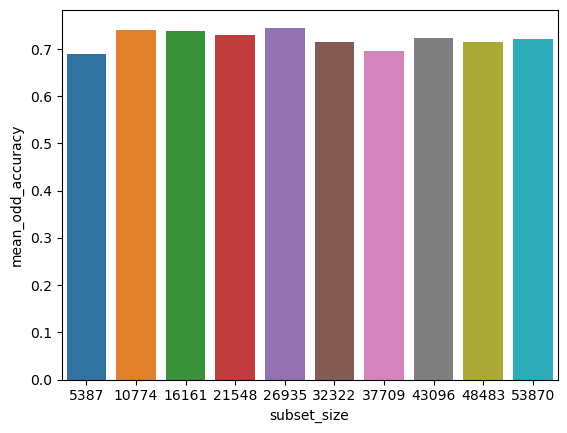

In [11]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])

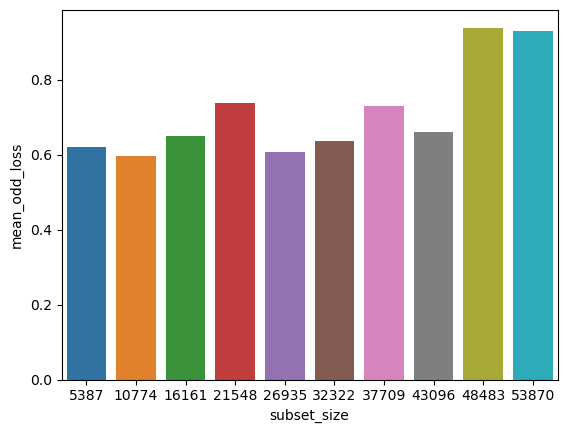

In [12]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])

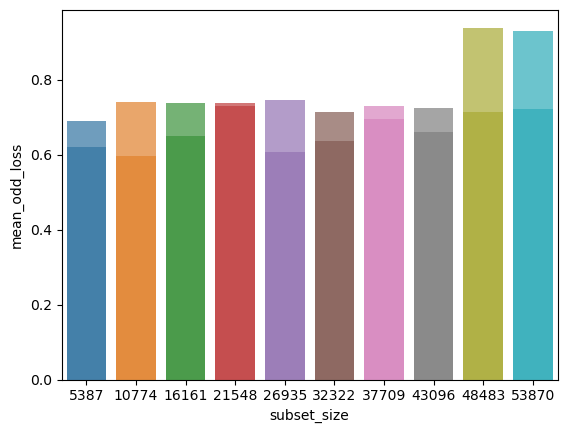

In [13]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)

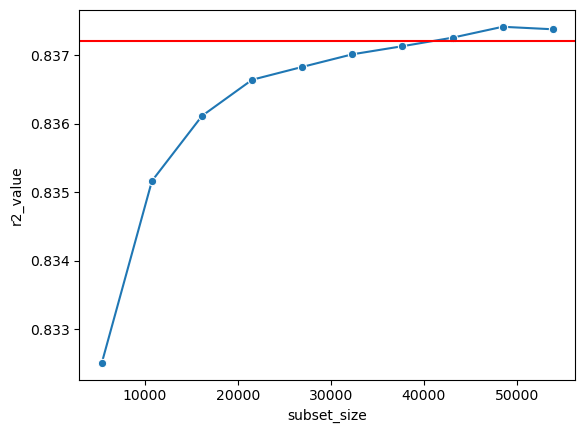

In [14]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

(0.4, 1.5)

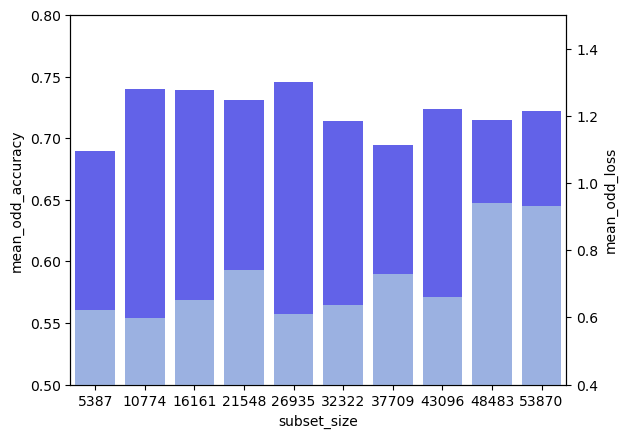

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.5, 0.8)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.4, 1.5)

(0.1, 0.4)

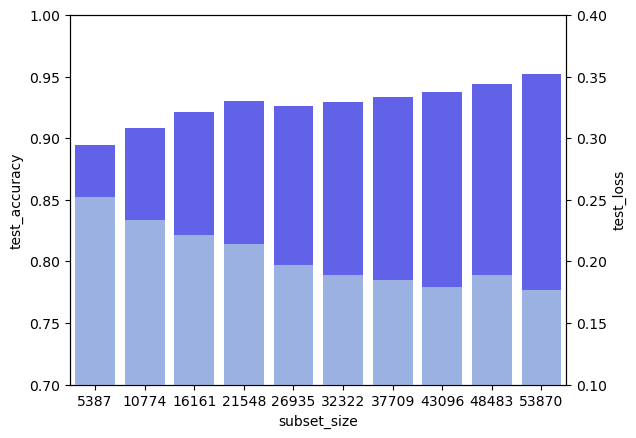

In [17]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.7, 1.0)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.1, 0.4)


In [18]:
results_df.to_csv('../analysis_results/sst2_bert.csv', index=False)